<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/paper3_contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv(path +'Copy of train.psv', sep='|')

In [5]:
# Load libraries

from numpy import arange
from numpy import set_printoptions
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Statistical Summary
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

              HR      O2Sat        Temp  ...  HospAdmTime     ICULOS  SepsisLabel
count  1.059e+06  1.018e+06  394625.000  ...    1.167e+06  1.167e+06    1.167e+06
mean   8.471e+01  9.721e+01      36.994  ...   -5.331e+01  2.670e+01    1.921e-02
std    1.717e+01  2.928e+00       0.772  ...    1.498e+02  2.777e+01    1.373e-01
min    2.000e+01  2.000e+01      20.900  ...   -3.711e+03  1.000e+00    0.000e+00
25%    7.200e+01  9.600e+01      36.500  ...   -4.268e+01  1.100e+01    0.000e+00
50%    8.400e+01  9.800e+01      37.000  ...   -4.880e+00  2.100e+01    0.000e+00
75%    9.600e+01  9.950e+01      37.500  ...   -3.000e-02  3.400e+01    0.000e+00
max    2.800e+02  1.000e+02      50.000  ...    2.399e+01  3.360e+02    1.000e+00

[8 rows x 41 columns]


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,1.059e+06,84.712,17.173,20.00,72.00,84.00,96.00,280.00
O2Sat,1.018e+06,97.212,2.928,20.00,96.00,98.00,99.50,100.00
Temp,3.946e+05,36.994,0.772,20.90,36.50,37.00,37.50,50.00
SBP,9.933e+05,122.800,22.664,20.00,106.00,120.00,137.00,300.00
MAP,1.030e+06,81.164,16.025,20.00,70.00,79.00,90.00,300.00
DBP,7.331e+05,62.805,13.716,20.00,53.00,61.00,70.50,300.00
Resp,1.010e+06,18.736,5.192,1.00,15.00,18.00,22.00,100.00
EtCO2,2.740e+04,33.234,8.215,10.00,28.50,33.50,38.00,100.00
BaseExcess,8.333e+04,-0.671,4.292,-32.00,-3.00,0.00,1.00,100.00
HCO3,6.441e+04,24.082,4.387,0.00,22.00,24.00,27.00,55.00


In [8]:
# Class Distribution
class_counts = data.groupby('SepsisLabel').size()
print(class_counts)

SepsisLabel
0    1144776
1      22426
dtype: int64


In [9]:
shape = data.shape
print(shape)

(1167202, 41)


In [10]:
plt.rcParams["figure.figsize"] = (20, 15)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state= 0 )

In [12]:
data=data.sample(n=100000,random_state=1,replace=True)

In [13]:
Xcol = data.drop(columns = ["SepsisLabel"])
ycol = data["SepsisLabel"]
X=np.array(Xcol)
y=np.array(ycol)
X.shape,y.shape

((100000, 40), (100000,))

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X = imputer.fit_transform(X)

In [15]:
X_rs, y_rs = smote.fit_resample(X, y)

In [16]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9880786313686997


In [17]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24419
           1       0.99      0.98      0.99     24610

    accuracy                           0.99     49029
   macro avg       0.99      0.99      0.99     49029
weighted avg       0.99      0.99      0.99     49029



In [18]:
bgc_probs = model.predict_proba(X_test)

In [19]:
bgc_probs=bgc_probs[:, 1]

In [20]:
from sklearn.metrics import roc_auc_score

# calculate scores
bgc_auc = roc_auc_score(Y_test, bgc_probs)


print('Bagging Classifier with 100  trees: ROC AUC= {} %'.format(round(bgc_auc, 3)*100))

Bagging Classifier with 100  trees: ROC AUC= 99.8 %


In [21]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
bgc_fpr, bgc_tpr, bgc_thres = roc_curve(Y_test, bgc_probs)

In [22]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.992932845704968


In [23]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24419
           1       1.00      0.99      0.99     24610

    accuracy                           0.99     49029
   macro avg       0.99      0.99      0.99     49029
weighted avg       0.99      0.99      0.99     49029



In [24]:
rfc_probs = model.predict_proba(X_test)

In [25]:
rfc_probs=rfc_probs[:,1]

In [26]:
from sklearn.metrics import roc_auc_score

# calculate scores
rfc_auc = roc_auc_score(Y_test, rfc_probs)


print('Random Forest Classifier with 100  trees: ROC AUC= {} %'.format(round(rfc_auc, 3)*100))

Random Forest Classifier with 100  trees: ROC AUC= 99.9 %


In [27]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
rfc_fpr, rfc_tpr, rfc_thres = roc_curve(Y_test, rfc_probs)

In [28]:
# Extra Trees Classification
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9968080304072064


In [29]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24419
           1       1.00      0.99      1.00     24610

    accuracy                           1.00     49029
   macro avg       1.00      1.00      1.00     49029
weighted avg       1.00      1.00      1.00     49029



In [30]:
ext_probs = model.predict_proba(X_test)

In [31]:
ext_probs=ext_probs[:,1]

In [32]:
from sklearn.metrics import roc_auc_score

# calculate scores
ext_auc = roc_auc_score(Y_test, ext_probs)


print('Extra Trees Classifier with 100  trees: ROC AUC= {} %'.format(round(ext_auc, 3)*100))

Extra Trees Classifier with 100  trees: ROC AUC= 100.0 %


In [33]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
ext_fpr, ext_tpr, ext_thres = roc_curve(Y_test, ext_probs)

In [34]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.8417713160581718


In [35]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.91312230407429


In [36]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9489137053441841


In [37]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     24419
           1       0.96      0.89      0.92     24610

    accuracy                           0.93     49029
   macro avg       0.93      0.93      0.93     49029
weighted avg       0.93      0.93      0.93     49029



In [38]:
gbc_probs = model.predict_proba(X_test)

In [39]:
gbc_probs = gbc_probs[:, 1]

In [40]:
from sklearn.metrics import roc_auc_score

# calculate scores
gbc_auc = roc_auc_score(Y_test, gbc_probs)


print('Gradient Boosting Classifier with 100  trees: ROC AUC= {} %'.format(round(gbc_auc, 3)*100))

Gradient Boosting Classifier with 100  trees: ROC AUC= 97.89999999999999 %


In [41]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
gbc_fpr, gbc_tpr, gbc_thres = roc_curve(Y_test, gbc_probs)

In [42]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
num_trees=30
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     24419
           1       0.91      0.82      0.86     24610

    accuracy                           0.87     49029
   macro avg       0.87      0.87      0.87     49029
weighted avg       0.87      0.87      0.87     49029



In [43]:
ada_probs=model.predict_proba(X_test)
ada_probs=ada_probs[:,1]

In [44]:
ada_auc = roc_auc_score(Y_test, ada_probs)


print('ADABoost Classifier with 30 trees: ROC AUC= {} %'.format(round(ada_auc, 3)*100))

ADABoost Classifier with 30 trees: ROC AUC= 93.30000000000001 %


In [45]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
ada_fpr, ada_tpr, ada_thres = roc_curve(Y_test, ada_probs)

In [46]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, Y_train)
predicted = ensemble.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     24419
           1       0.96      0.99      0.97     24610

    accuracy                           0.97     49029
   macro avg       0.97      0.97      0.97     49029
weighted avg       0.97      0.97      0.97     49029



In [47]:
ensemble_probs=ensemble.predict_proba(X_test)
ensemble_probs=ensemble_probs[:,1]

In [48]:
ensemble_auc = roc_auc_score(Y_test, ensemble_probs)


print('Voting Classifier with LR, CART, KNN: ROC AUC= {} %'.format(round(ensemble_auc, 3)*100))

Voting Classifier with LR, CART, KNN: ROC AUC= 99.6 %


In [49]:
ensemble_fpr, ensemble_tpr, ensemble_thres = roc_curve(Y_test, ensemble_probs)

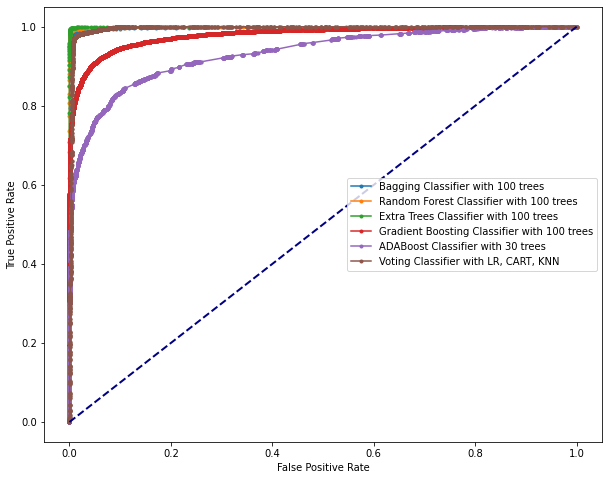

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(bgc_fpr,bgc_tpr, marker='.', label='Bagging Classifier with 100 trees')
ax.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier with 100 trees' )
ax.plot(ext_fpr, ext_tpr,marker='.', label='Extra Trees Classifier with 100 trees')
ax.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting Classifier with 100 trees')
ax.plot(ada_fpr, ada_tpr, marker='.', label='ADABoost Classifier with 30 trees')
ax.plot(ensemble_fpr, ensemble_tpr, marker='.', label= 'Voting Classifier with LR, CART, KNN' )
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()